# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# BEGINNER PYTHON

As this is a beginner version, we include a lot of code here to help you along the way.

**First, fill in your identification information below. Then, you only have to type in the answers to the questions we ask you. For the rest of the cells, just Run them by pressing the "Run" button above.**

# Identification Information

In [1]:
# YOUR NAME              = THI MY DUNG NGUYEN
# YOUR MITX PRO USERNAME = dungnguyen_ivi
# YOUR MITX PRO E-MAIL   = dungnguyen.ivi@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [2]:
!pip install surprise==0.1

     |████████████████████████████████| 3.3MB 2.8MB/s eta 0:00:01     |███                             | 307kB 2.8MB/s eta 0:00:02
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise
You should consider upgrading via the 'pip install --upgrade pip' command.


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go. If you don't see that blue indicator, then your kernel may not be working properly. If this happens, try saving your work, closing the notebook and re-opening it.

# Import

Import the required tools into the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
print('Imports successful!')

Imports successful!


In [2]:
%matplotlib inline

# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [3]:
data = Dataset.load_builtin('ml-100k')
print('Data load successful!')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/nbuser/.surprise_data/ml-100k
Data load successful!


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.

Histogram generation successful!


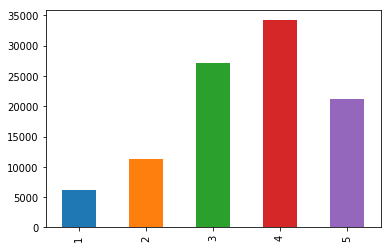

In [4]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

print('Histogram generation successful!')

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

*Type your response here...*

There are 100000 ratings in the dataset.
There are 1682 movies in the dataset.
There are 943 users in the dataset.
The distribution of ratings is negatively skewed.
The distribution of ratings has a mean of 3.52986, and a median of 4.0.
The distribution of ratings has a minimum value of 1, and a maximum value of 5.
The range of the distribution is 4.
The distribution of ratings has a variance of 1.267141051810097, and a standard deviation of 1.125673599144129.
The distribution of ratings has an Interquartile range (IQR) of 1.0.


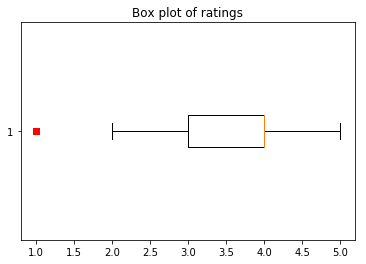

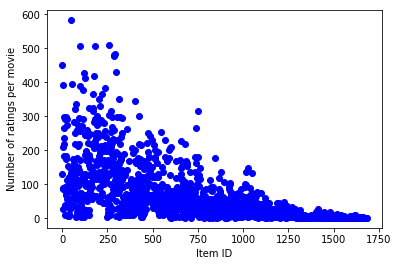

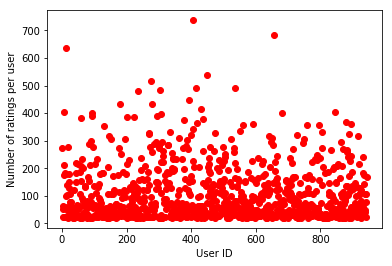

In [5]:
### Answer to question 1
nbratings = len(ratings)
skewness = ratings.skew()
mean = ratings.mean()
median = ratings.median()
minrating = ratings.min()
maxrating = ratings.max()
var = ratings.var()
std = sqrt(var)
q1 = ratings.quantile(0.25)
q3 = ratings.quantile(0.75)
nbmovies = len(np.unique(raw_data.item_id))
nbusers = len(np.unique(raw_data.user_id))
ratings_per_movie = raw_data.groupby('item_id')['rating'].count()
ratings_per_user = raw_data.groupby('user_id')['rating'].count()


print ('There are ' + str(nbratings) + ' ratings in the dataset.')
print ('There are ' + str(nbmovies) + ' movies in the dataset.')
print ('There are ' + str(nbusers) + ' users in the dataset.')

if skewness > 0:
    print ('The distribution of ratings is positively skewed.')
elif skewness < 0:
    print ('The distribution of ratings is negatively skewed.')
else:
    print ('The distribution of ratings is symmetric, i.e. similar to the normal distribution.')
    
print ('The distribution of ratings has a mean of ' + str(mean) + ', and a median of ' + str(median) + '.')
print ('The distribution of ratings has a minimum value of ' + str(minrating) + ', and a maximum value of ' + str(maxrating) + '.')
print ('The range of the distribution is ' + str(maxrating - minrating) + '.')
print ('The distribution of ratings has a variance of ' + str(var) + ', and a standard deviation of ' + str(std) + '.')
print ('The distribution of ratings has an Interquartile range (IQR) of ' + str(q3 - q1) + '.')

# Generate plots for ratings data
f1 = plt.figure(1)
plt.boxplot(ratings, 0, 'rs', 0)
plt.title('Box plot of ratings')

f2 = plt.figure(2)
plt.plot(ratings_per_movie, 'o', color = 'blue')
plt.ylabel('Number of ratings per movie')
plt.xlabel('Item ID')

f3 = plt.figure(3)
plt.plot(ratings_per_user, 'o', color = 'red')
plt.ylabel('Number of ratings per user')
plt.xlabel('User ID')

plt.show()

# Model 1: Random

In [6]:
# Create model object
model_random = NormalPredictor()
print('Model creation successful!')

Model creation successful!


In [7]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5245  1.5206  1.5223  1.5130  1.5275  1.5215  0.0049  
Fit time          0.19    0.21    0.19    0.31    0.37    0.25    0.07    
Test time         0.23    0.29    0.24    0.29    0.36    0.28    0.05    
Model training successful!


# Model 2: User-Based Collaborative Filtering

In [8]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [9]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9847  0.9829  0.9758  0.9754  0.9732  0.9784  0.0045  
Fit time          0.49    0.47    0.71    0.99    0.69    0.67    0.19    
Test time         5.97    6.25    8.64    6.84    7.32    7.00    0.94    
Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [10]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [11]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9721  0.9745  0.9776  0.9790  0.9692  0.9745  0.0036  
Fit time          1.00    0.96    1.02    1.16    3.25    1.48    0.89    
Test time         9.19    6.84    6.90    10.10   8.81    8.37    1.29    
Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

The result of the item-based model is slightly better than the result of the user-based model since the mean RMSE of the item-item model is 0.9745 which is slightly smaller than the mean RMSE of 0.9784 of the user-user model. However, the time consumption of the item-item model is longer compared to the user-user model regarding both fit time and test time.
The reason why item-item model is better than user-user model can be because we have many popular movies that have been rated more often, therefore the model has better similarity scores, leading to a better result.

Compare to the original random model, the collaborative filtering models give us the better results with lower RMSEs (random model has a RMSE of 1.5215 on average which is larger than the RMSEs of the CF models).

# Model 4: Matrix Factorization

In [12]:
# Create model object
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [13]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9297  0.9373  0.9449  0.9363  0.9349  0.9366  0.0049  
Fit time          7.92    8.36    8.96    10.06   7.53    8.57    0.89    
Test time         0.34    0.40    0.46    0.35    0.41    0.39    0.04    
Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

The collaborative filtering (CF) models use the user-item interation matrix to calculate users' similarities or items' similarities by taking the inner products of rows or columns, while the matrix factorization model decomposes the user-item interaction matrix into 2 lower dimensionality rectangular matrices (low-rank matrix factorization), one is user matrix representing the relationship between users and latent factors and the other one is item matrix indicating the similarity between items and latent factors, then calculate the similarities by inner products of latent user factors and latent item factors.

The RMSE of Matrix factorization model, which is 0.9366 on average, is lower than the RMSEs of the CF models. Thus, there is an improvement. Additionally, the test time is less compared to the test times of the CF models, but the fit time is longer.

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k). **Make sure you run this cell.**

In [14]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('Function creation successful!')

Function creation successful!


Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

There is one interesting point that comparing the F1 scores, which is the harmonic mean of Precision and Recall, between 4 models, the User-user CF model turns out to perform better than the other models at both k = 5 and 10. 
Comparing only the Precision, the Item-item CF model performs better than the other models at both k = 5 and 10.

This resut is different than the result we had by comparing the RMSEs of 4 models, which showed that Matrix factorization model is the best one out of 4 models.

In [15]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> recall  :', round(sum(r) / len(r), 3))
        print('>>> f1 score:', round(2 * ((sum(p) / len(p)) * (sum(r) / len(r))) / ((sum(p) / len(p)) + (sum(r) / len(r))), 3))
        print('\n')

print('Precision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.59
>>> recall  : 0.343
>>> f1 score: 0.434


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.765
>>> recall  : 0.456
>>> f1 score: 0.572


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.818
>>> recall  : 0.392
>>> f1 score: 0.53


>>> 

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [16]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [17]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

The ratings of top-n recommendations for the user id 186 are as follow (n is chosen to be equal to 5):

-Random model: 5 for top 5 recommendations

-User-user CF mdel: 5 for top 5 recommendations

-Item-item CF model: 4.07 for the 1st, 4.05 for the 2nd, 3.99 for the 3rd, 3.98 for the 4th, 3.97 for the 5th

-Matrix factorization model: 4.75 for the 1st, 4.74 for the 2nd, 4.7 for the 3rd, 4.69 for the 4th, 4.58 for the 5th

In summary, each model recommends different items with different ratings.

In the real world, we can use the recommendation techniques to recommend the customers the company's products that are similar to their preferences. In this way, we can increase the company's profit and collect more data regarding the customers' preferences.

In [18]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[1]
    print(f'model: {model}, {user}: {top_n[user]}')

print('Top N computation successful!')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7fdaac108c50>, 186: [('265', 5), ('451', 5), ('222', 5), ('144', 5), ('16', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fdaac1a2390>, 186: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fdaac1a2240>, 186: [('1674', 4.06896551724138), ('686', 4.051848353096544), ('732', 3.9958623794626216), ('5', 3.9862571454892457), ('1597', 3.9743534464180468)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fdaac1a2080>, 186: [('169', 4.749630527724771), ('318', 4.737875604777075), ('515', 4.701155516716556), ('496', 4.694099239802762), ('174', 4.5841515082852835)]
Top N computation successful!


<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.